In [5]:
import numpy as np
import pandas as pd 
import pickle
from sklearn import preprocessing
from scipy import sparse
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
import scipy
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz as grviz
from scipy.sparse import csr_matrix
from scipy.sparse import coo_matrix, hstack

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance
from xgboost import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#from sklearn.grid_search import GridSearchCV 
import matplotlib
import shap

root = 'C:\\Users\\idan\\PycharmProjects\\MLProject\\mlproject\\datasets\\datasets\\'
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

pd.set_option('use_inf_as_na', True)

## Read Data - 2012 lamas prat data with 2016 actual values of varaibles to be predicted - futereLFP, future_hour_income and incomeGroupUp 


In [6]:
dflearning = pd.read_csv(root + 'dflearning.csv')
dflearning = dflearning.sample(frac=1)
dflearning = dflearning.replace(np.Inf, np.nan)
# for those who want to use features from household data (you have to left join them to prat data and also for scoring:
dflearningMB = pd.read_csv(root + 'dflearningMB.csv')

C:\Users\idanw\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (23,69,171) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\idanw\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (64) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
dflearning.head(100)

,Unnamed: 0,achacherz,achnbruavodkodem,achnhartzaa,achnmeshekbayit,achnshiurprati,achnsmartafut,achuzezrashbshnati,anglitshp,anglitshpmisparpeamim,avad12hodashim,avadshana,avodaneedar,bateyseferlamad,beayabriut,beayamafria,bituach,bitzuashbshavuasheavar,bmi,brutoazmaishnati,brutoazmaishnatinew,brutosachir,brutosachirnew,bsysh,c_sachlemaase,chipeschodesh,chipesshana,chipesshavua,dat,datateist,datiutloyehudi,datiutyehudi,ezrashb,ezrashbkamutyamim,ezrashbshavuaacharon,ezrashbshavuasheavar,gil,gilm,hashavani,haskalagvohayeledhoreahr,haskalagvohayeledhoreav,haskalagvohayeledhoreem,hatavotlobbruto,havraakalul,hishtatfutkalul,ikaritpachot35,imutanaf,imutanafagaf,imutmishlach,ivritdibur,ivritkria,ivritktiva,k_gova,k_mishkal,k_safaikarit,k_semelmiktzlim,k_semelmiktzlim2,k_sfatem,k_shnataliya,k_shnlimklali,k_sug_mosad,kamaavaddy,kamaavadk,kamaavadn2,kamaavadny,kamaavadnych,kamaavady,kamanosaf,kamapachot,kita,kodeshshp,kodeshshpmisparpeamim,koshihalicha,koshilehitrachetz,koshilevush,koshimb,koshireia,koshishmia,koshizikaron,kriahanaa,lashonshp,lashonshpmisparpeamim,leom,limudim,limudim2,m_eretz,m_eretzav,m_eretzem,maanakkalul,mamadavoda,mamadavoday,maongan,maonganyesodi,maonganyesodi2,matanakalul,matematshp,matematshpmisparpeamim,matzavbriut,mazav,mekabelsachar,mekabelsachary,mekomotavoda,meunyanlaavod,mezaheprat,miktzlim1asakim,miktzlim1madaeihevra,miktzlim2asakim,miktzlim2madaeihevra,mikumavoda,mikumavoday,miluyatzmi,min,mishkalorech,mishkalprat,misparachrai,misparav,misparbenzug,misparem,misparhodashimachacher,misparhodashimbituah,misparhodashimhartzaa,misparhodashimmeshekbayit,misparhodashimshiurprati,misparhodashimsmartafut,misparmeshivp,misparmeshivproxy,misparprat,misramelea,misrameleay,nifkadgalkodem,nifkadgalkodemh,ofen_mehush,oved35,oved35y,paamachronachashavani,pidyonkalul,pitzuyimkalul,proxy,rechevchevra,rechevkalul,rmbkt,s_seker,sacshnati_leprat,sacshnati_lepratmeavoda,sacshnati_lepratnew,safanosefetacheret,safanosefetanglit,safanosefetaravit,safanosefetidish,safanosefetivrit,safanosefetloyodea,safanosefetrusit,safanosefetsacheret,safanosefetsfaradit,safanosefetzarfatit,schumachacherz,schumachnhartzaa,schumachnshiurprati,schumbituach,schummeshekbayit,schumsmartafut,semelanaf,semelanafy,semelmishlach,semelmishlachy,shana,shanaazmai,shaotavoday,shaotbdk,shiureybayit,shp,sibaikarit12chod,sibalozamin,siduri,sviutratzonhashkaayeledhoreahr,sviutratzonhashkaayeledhoreav,sviutratzonhashkaayeledhoreem,sviutratzontziyunyeledhoreahr,sviutratzontziyunyeledhoreav,sviutratzontziyunyeledhoreem,tadirutmeoravuthoretzevetahr,tadirutmeoravuthoretzevetav,tadirutmeoravuthoretzevetem,tadirutsichahitnahagutahr,tadirutsichahitnahagutav,tadirutsichahitnahagutem,tadirutsichakesherchevahr,tadirutsichakesherchevav,tadirutsichakesherchevem,tadirutsichatchanimahr,tadirutsichatchanimav,tadirutsichatchanimem,tadirutsichatziyunahr,tadirutsichatziyunav,tadirutsichatziyunem,tadirutsichayachastzevetbsahr,tadirutsichayachastzevetbsav,tadirutsichayachastzevetbsem,tashlumacherkalul,tchunatavodabederechklal,tchunatavodashnatit,tchunatavodashvuit,teudaeretz,teudagvoha,tlush,toarakademiyeledhoreahr,toarakademiyeledhoreav,toarakademiyeledhoreem,wave,yachas,yachaskirvakalkali,yamim,yamimy,yedahashkaayeledhoreahr,yedahashkaayeledhoreav,yedahashkaayeledhoreem,yedatziyunyeledhoreahr,yedatziyunyeledhoreav,yedatziyunyeledhoreem,zminut,id,labour_force_participation,n,bruto,hour_income,haveIncome,gilGroup,nhaveIncome,nGroup,groupRank,incomeGroup,MeanIncomeGroup,futureIncomeGroup,futereLFP,future_hour_income,future_mean_income_group,incomeGroupUp,incomeGroupDown
3136,13401,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,12.0,NaN,NaN,StudiedonlyinPast,yes,Disturbing,0.0,NaN,NaN,NaN,0.0,NaN,5342.000000,NaN,0.0,NaN,NaN,NaN,Jewish,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,29.0,Never,NaN,NaN,NaN,0.0,0.0,0.0,StudiesCalculated,NaN,NaN,NaN,VeryGood,VeryGood,VeryGood,179_175,74_70,Hebrew,NaN,NaN,Hebrew,NaN,16andmore,Univercities,NaN,0.0,12.0,12.0,NaN,NaN,NaN,10.0,NaN,NaN,NaN,ALitleDifficulty,NoDifficulty,

In [4]:
dflearning.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5117 entries, 3655 to 2382
Columns: 178 entries, Unnamed: 0 to incomeGroupDown
dtypes: bool(5), float64(77), int64(8), object(88)
memory usage: 6.8+ MB


## Visual analysis of targets 2012 - 2016

## Mission 1: PREDICT LBOUR FORCE PARTICIPATION - LFP

In [5]:
transition = pd.crosstab(index=dflearning["labour_force_participation"], 
                            columns=dflearning['futereLFP'],
                             margins=True)
transition.style.format("{:,.0f}")

futereLFP,False,True,All
labour_force_participation,,,
False,"1,443",672,"2,115"
True,369,"2,633","3,002"
All,"1,812","3,305","5,117"


In [6]:
transition.div(transition["All"],axis=0).style.format("{:.2%}")

futereLFP,False,True,All
labour_force_participation,,,
False,68.23%,31.77%,100.00%
True,12.29%,87.71%,100.00%
All,35.41%,64.59%,100.00%


## Mission 2: Relative income rank change - Predict decile income group improvment at 2016

In [7]:
transition = pd.crosstab(index=dflearning["incomeGroup"], 
                            columns=dflearning['futureIncomeGroup'],
                             margins=True)

transition.style.format("{:,.0f}")

futureIncomeGroup,4.0,5.0,6.0,7.0,8.0,9.0,10.0,All
incomeGroup,,,,,,,,
4,"1,535",116,108,64,58,49,60,"1,990"
5,141,164,85,54,38,11,8,501
6,86,72,150,95,50,14,5,472
7,58,32,88,152,124,33,8,495
8,47,23,22,89,168,126,29,504
9,42,6,17,32,104,257,106,564
10,63,9,11,8,18,87,395,591
All,"1,972",422,481,494,560,577,611,"5,117"


In [8]:
transition.div(transition["All"],axis=0).style.format("{:.2%}")    

futureIncomeGroup,4.0,5.0,6.0,7.0,8.0,9.0,10.0,All
incomeGroup,,,,,,,,
4,77.14%,5.83%,5.43%,3.22%,2.91%,2.46%,3.02%,100.00%
5,28.14%,32.73%,16.97%,10.78%,7.58%,2.20%,1.60%,100.00%
6,18.22%,15.25%,31.78%,20.13%,10.59%,2.97%,1.06%,100.00%
7,11.72%,6.46%,17.78%,30.71%,25.05%,6.67%,1.62%,100.00%
8,9.33%,4.56%,4.37%,17.66%,33.33%,25.00%,5.75%,100.00%
9,7.45%,1.06%,3.01%,5.67%,18.44%,45.57%,18.79%,100.00%
10,10.66%,1.52%,1.86%,1.35%,3.05%,14.72%,66.84%,100.00%
All,38.54%,8.25%,9.40%,9.65%,10.94%,11.28%,11.94%,100.00%


## Mission 3: Hourly Income - Predicting Hourly Income in 2016 for those who worked

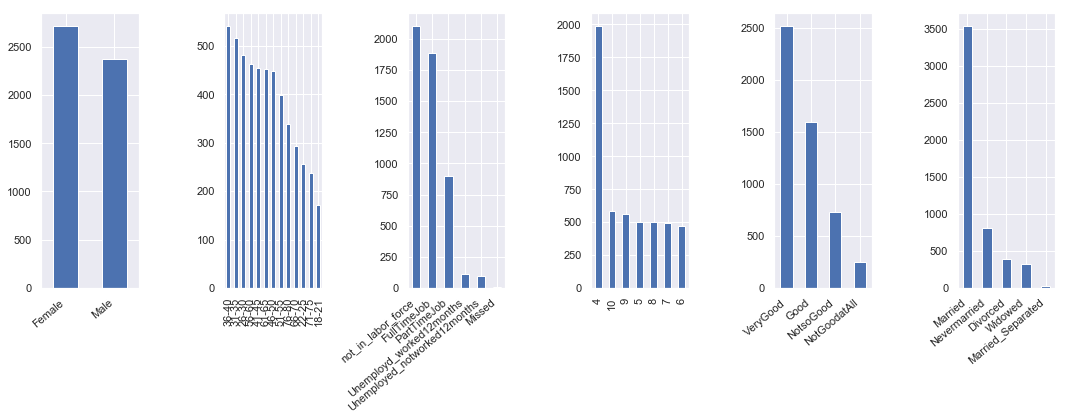

In [109]:
color = dict(boxes='DarkGreen', whiskers='DarkOrange',
            medians='DarkBlue', caps='Gray')

#dflearning[['hour_income','future_hour_income']].plot.box(color=color,sym='r+',ylim=(0,600),figsize=(20,10))
#dflearning[['hour_income','future_hour_income']].plot.box(color=color,sym='r+',ylim=(0,120),figsize=(20,10))
#plt.hist(dflearning['gilGroup'])
#dflearning['gilGroup'].value_counts().plot(kind='bar')
plt.figure(figsize=(15,10))
plt.subplot(2,6,1)
ax=dflearning['min'].value_counts().plot(kind='bar')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.subplot(2,6,2)
dflearning['gilGroup'].value_counts().plot(kind='bar')
#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.subplot(2,6,3)
ax=dflearning['tchunatavodashvuit'].value_counts().plot(kind='bar')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.subplot(2,6,4)
dflearning['incomeGroup'].value_counts().plot(kind='bar')
plt.subplot(2,6,5)
ax = dflearning['matzavbriut'].value_counts().plot(kind='bar')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.subplot(2,6,6)
ax=dflearning['mazav'].value_counts().plot(kind='bar')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.savefig('categorical vars.pdf')


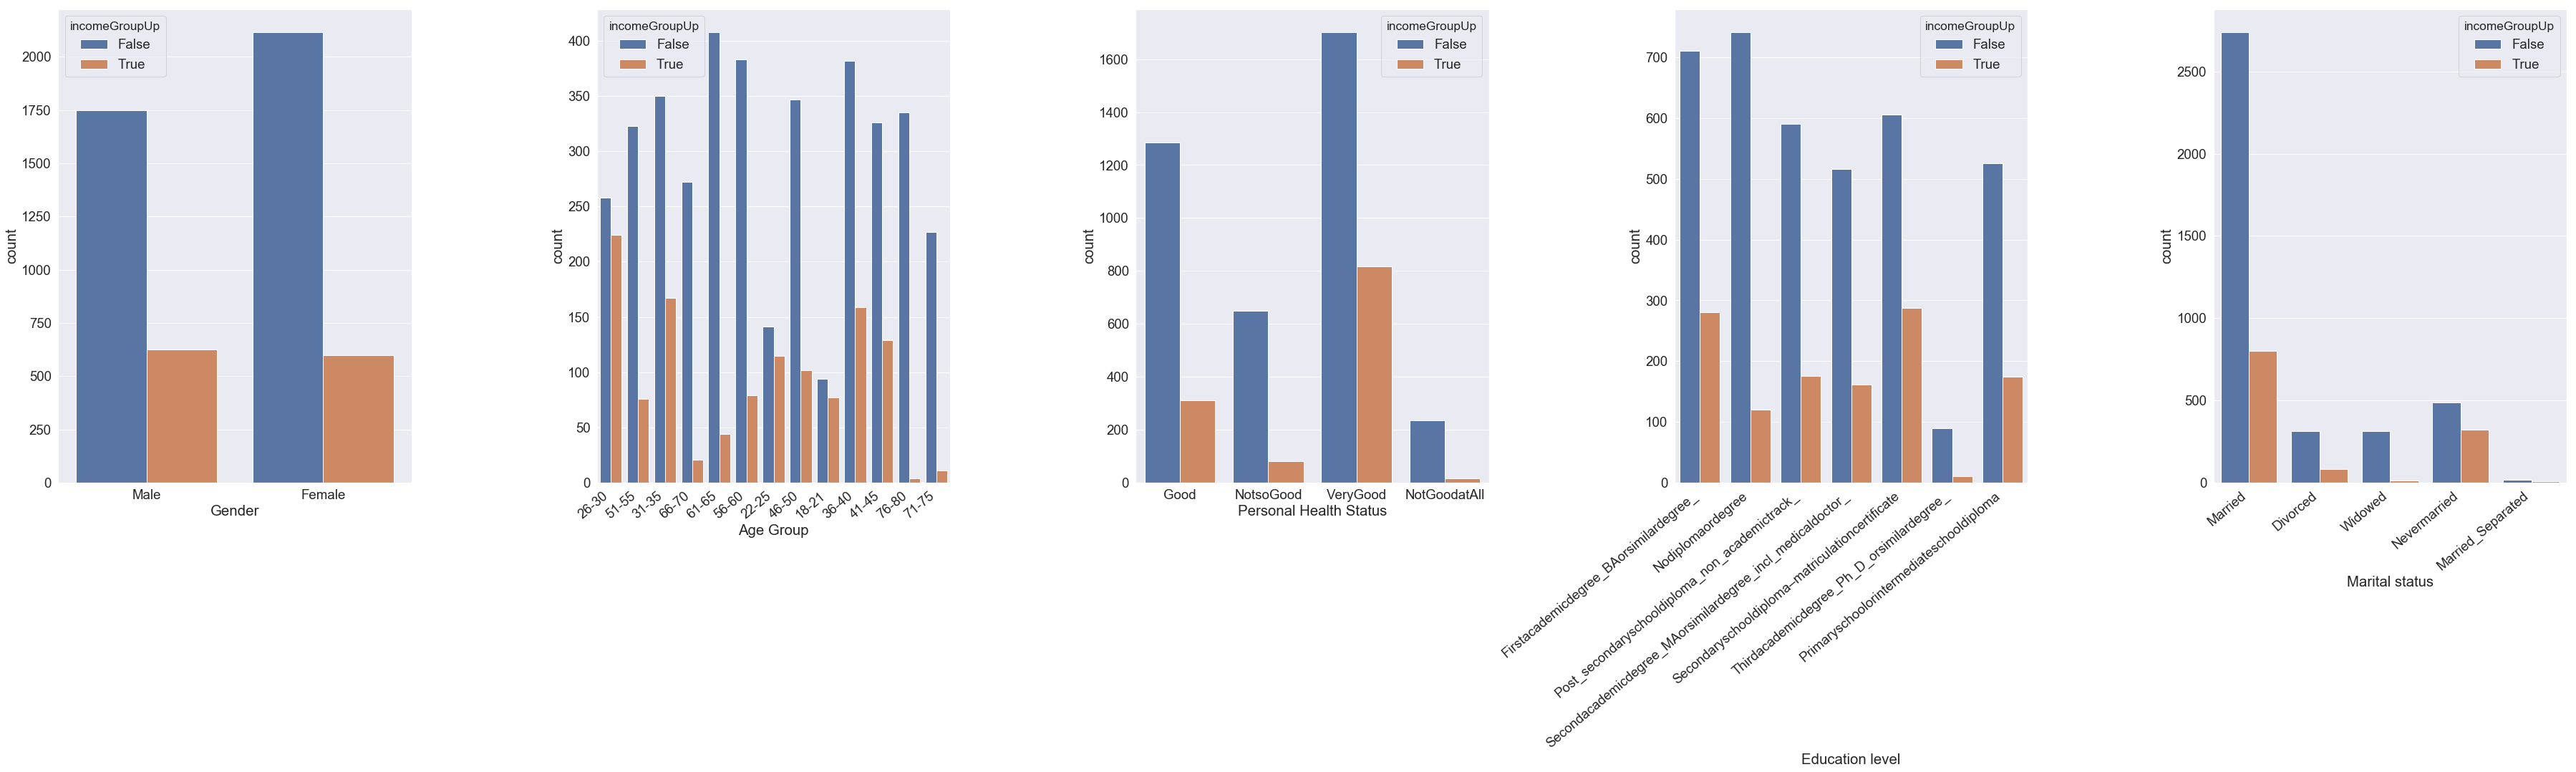

In [24]:
sns.set(style="darkgrid",font_scale=1.7)
f,axes = plt.subplots(1, 5 ,figsize=(50,15))
ax= sns.countplot(x="min",hue="incomeGroupUp", data=dflearning,ax=axes[0])
ax.set(xlabel='Gender')
ax = sns.countplot(x="gilGroup",hue="incomeGroupUp", data=dflearning,ax=axes[1])
ax.set(xlabel='Age Group')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax = sns.countplot(x="matzavbriut",hue="incomeGroupUp", data=dflearning,ax=axes[2])
ax.set(xlabel='Personal Health Status')
ax = sns.countplot(x="teudagvoha",hue="incomeGroupUp", data=dflearning,ax=axes[3])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set(xlabel='Education level')
ax = sns.countplot(x="mazav",hue="incomeGroupUp", data=dflearning,ax=axes[4])
ax.set(xlabel='Marital status')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout(pad=0.4)
ff=ax.get_figure()
ff.savefig('categorical vs incomeGroupUp.png', dpi=400)

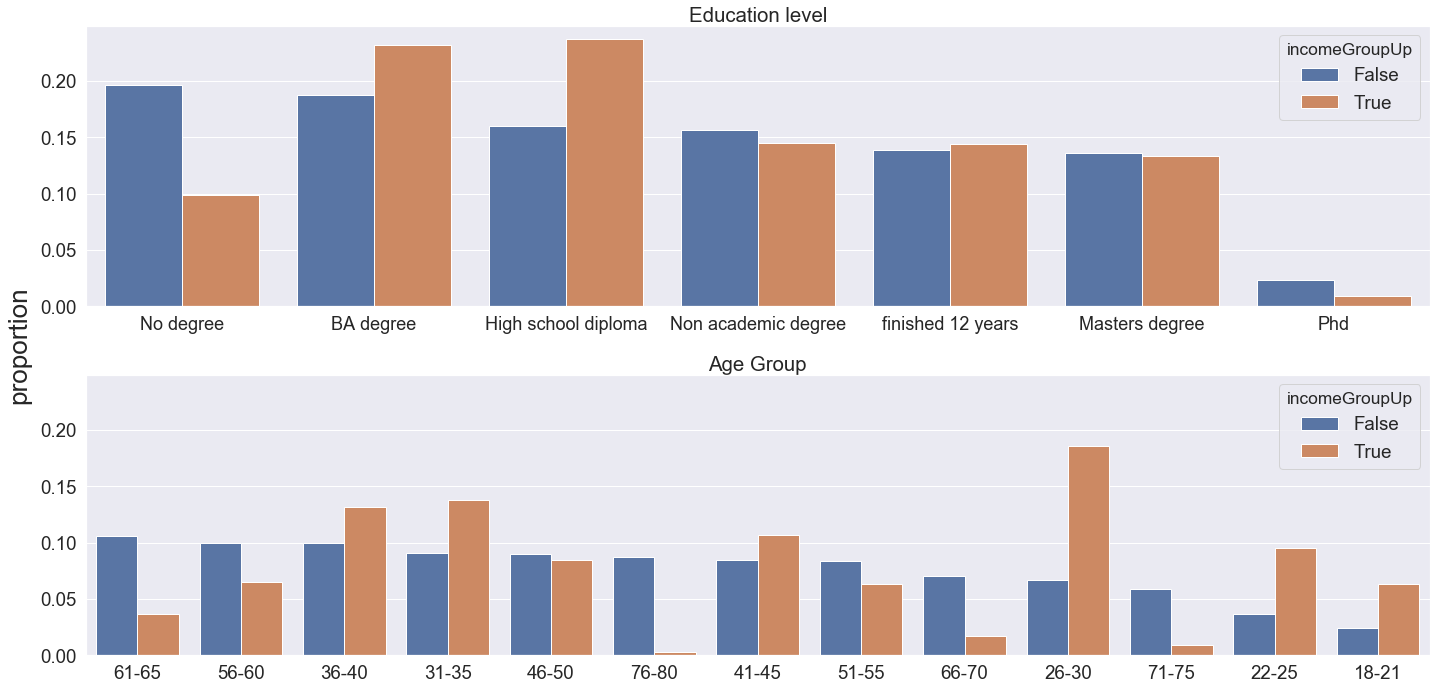

In [110]:
#sns.boxplot(x="incomeGroupUp", y="bruto", data=dflearning)

f,axes = plt.subplots(2, 1 ,figsize=(20,10),sharey=True)

ax =(dflearning['teudagvoha']
 .groupby(dflearning['incomeGroupUp'])
 .value_counts(normalize=True)
 .rename("proportion")
 .reset_index()
 .pipe((sns.barplot, "data"), x="teudagvoha", y="proportion", hue="incomeGroupUp",ax=axes[0]))
ax.set(xlabel='Education level',ylabel="")
#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",fontsize=12)
ax.set_xticklabels(('No degree', 'BA degree', 'High school diploma', 'Non academic degree', 'finished 12 years','Masters degree','Phd'),fontsize=18)
ax.xaxis.set_label_position('top') 

ax = (dflearning['gilGroup']
 .groupby(dflearning['incomeGroupUp'])
 .value_counts(normalize=True)
 .rename("proportion")
 .reset_index()
 .pipe((sns.barplot, "data"), x="gilGroup", y="proportion", hue="incomeGroupUp",ax=axes[1]))
ax.set(xlabel='Age Group' ,ylabel="")
ax.xaxis.set_label_position('top') 

plt.tight_layout()
ff=ax.get_figure()
ff.text(0.001, 0.5, 'proportion', ha='center', va='center', rotation='vertical',fontsize=26)
ff.savefig('categorical vs incomeGroupUp (education and Age group).png', dpi=800,pad_inches=0.1)

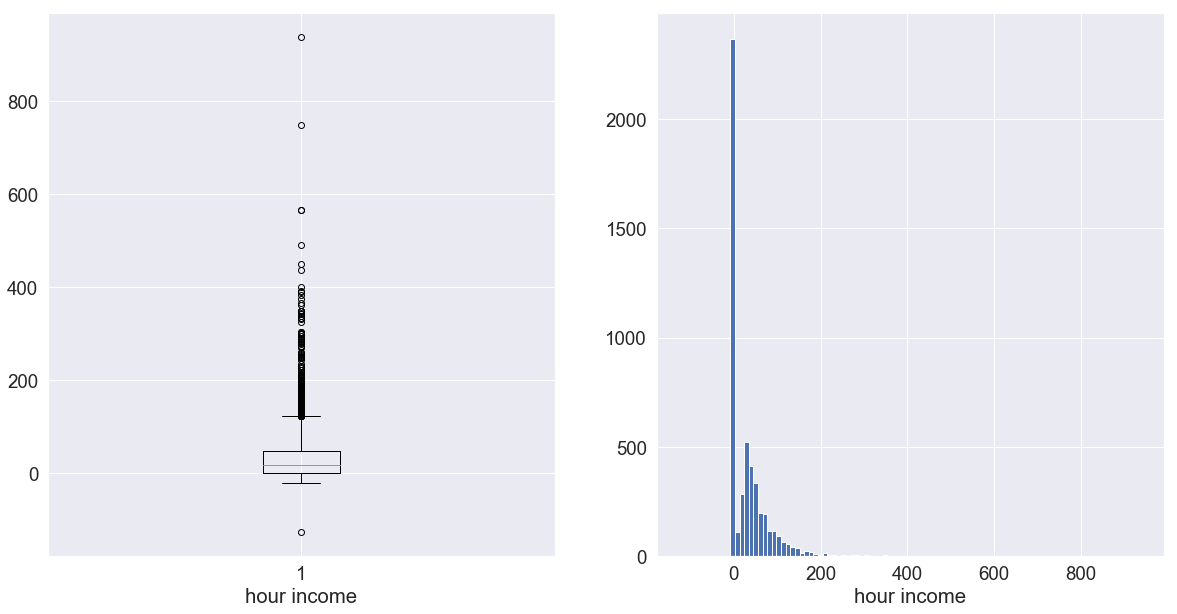

In [130]:
plt.figure(figsize=(20,10))
#plt.hist(dflearning['bruto'].dropna(),bins=100) #  remove NA and plot
plt.subplot(1, 2, 1)
plt.boxplot(dflearning['hour_income'].dropna())
plt.xlabel("hour income")
plt.subplot(1, 2, 2)
plt.hist(dflearning['hour_income'].dropna(),bins=100)
plt.xlabel("hour income")
plt.savefig('hist and box plot of hour income.png')

In [63]:
type(dflearning)

pandas.core.frame.DataFrame

In [10]:
"incomeGroupChange"
print(dflearning["incomeGroupUp"].mean()) 
print(dflearning["incomeGroupDown"].mean()) 

0.2425249169435216
0.20617549345319522


In [11]:
dflearning["AchAcherZ".lower()].value_counts()

0.0    4894
no      146
yes      76
8.0       1
Name: achacherz, dtype: int64

C:\Users\yossi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\yossi\Anaconda3\lib\site-packages\numpy\lib\function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\yossi\Anaconda3\lib\site-packages\numpy\lib\function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


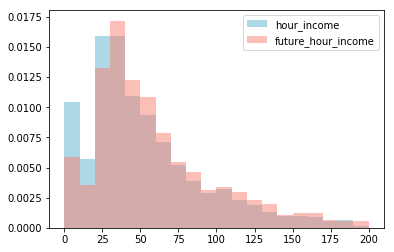

In [12]:
# comparing hour wage between 2012 to 2016
a=plt.hist(dflearning['hour_income'], bins=20, range=[0, 200],label='hour_income', color='lightblue',normed=True)
b=plt.hist(dflearning['future_hour_income'], bins=20, range=[0, 200], alpha=0.5, color='salmon',label='future_hour_income', normed=True)
plt.legend(loc='upper right')

C:\Users\yossi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Users\yossi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


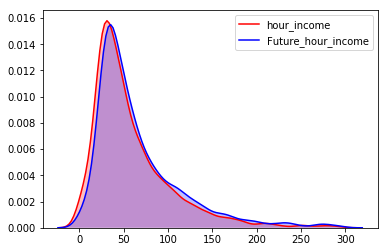

In [13]:
# comparing hour wage between 2012 to 2016 by distributions splines
p1=sns.kdeplot(dflearning['hour_income'],  clip=(0, 300),label='hour_income',shade=True, color="r")
p1=sns.kdeplot(dflearning['future_hour_income'], clip=(0, 300),label='Future_hour_income', shade=True, color="b")

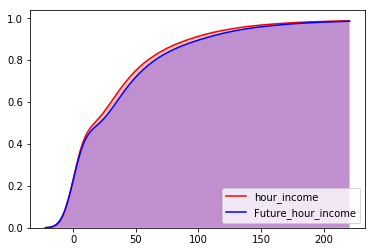

In [14]:
# comparing cumulative hour wage between 2012 to 2016
hour_income = dflearning['hour_income'].fillna(0)
future_hour_income = dflearning['future_hour_income'].fillna(0)
p1=sns.kdeplot(hour_income, cumulative=True, clip=(0, 200),label='hour_income',shade=True, color="r")
p1=sns.kdeplot(future_hour_income , cumulative=True, clip=(0, 200),label='Future_hour_income', shade=True, color="b")

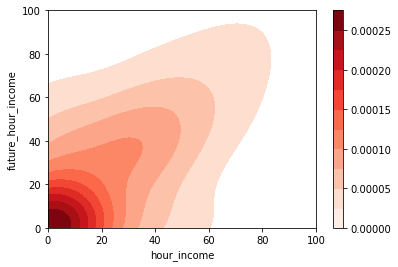

In [15]:
# comparing hour wage between 2012 to 2016 - 3d plot
hour_income = dflearning['hour_income'].fillna(0)
future_hour_income = dflearning['future_hour_income'].fillna(0)
ax = sns.kdeplot(hour_income, future_hour_income,  clip=(0, 100),cmap="Reds", shade=True, shade_lowest=False,bw=15, cbar=True)

## Prepare Data for modeling

In [16]:
drops = ['id','wave','misparprat','siduri','misparmeshivproxy','mishkalprat','mishkalorech',
         'nGroup','n','future_hour_income',
        'incomeGroupUp','incomeGroupDown','s_seker','futereLFP','gilGroup',
         'paamachronachashavani','futureIncomeGroup','gilm','future_mean_income_group']
#
YLFP = dflearning['futereLFP']
YhourIncome = dflearning['future_hour_income']
YincomeUp = dflearning['incomeGroupUp']

data=dflearning.drop(drops,axis=1)
cols = list(data.select_dtypes(include=['object']).columns)
X = pd.get_dummies(data=data, columns=cols,sparse=True)
# X['hour_income'] = X['hour_income'].replace(np.Inf, np.nan)
seed = 30
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, YLFP, test_size=test_size,random_state=seed)

## Modeling

In [18]:
bst = XGBClassifier = ......

## Model Analysis

In [19]:
imp = bst.get_booster().get_fscore()
imp = sorted(imp,key=imp.get,reverse=True)
cols = [*imp]

plt.rcParams['figure.figsize'] = [10, 10]
plot_importance(bst, ax=None, height=0.5, xlim=None, ylim=None,
                title='Feature importance', xlabel='F score', ylabel='Features', 
                importance_type='weight', max_num_features=60 )


## SHAP Analysis of model results

shap.initjs()
shap_values = shap.TreeExplainer(bst).shap_values(X_train)
explainer = shap.TreeExplainer(bst)

shap.force_plot(shap_values[1,:], X_train.iloc[10,:])

shap.force_plot(shap_values[1:20,], X_train.iloc[1:20].fillna(0))

shapv = pd.DataFrame(shap_values)
colum = list(X_train)
colum[len(colum):] = ['bias'] 
shapv.columns = colum
#shapv.head(100)
shap.force_plot(shap_values[0,:], X_train.iloc[10,:])
shap.summary_plot(shap_values, X_train,max_display=40)

for col in cols[0:80] :
    print(col)
    shap.dependence_plot(col, shap_values,X_train,interaction_index='gil', color='coolwarm')
    shap.dependence_plot(col, shap_values,X_train,interaction_index='min_Female')
    shap.dependence_plot(col, shap_values,X_train,interaction_index='k_shnlimklali_13_15')


# Might take a lot of time. Be patient, Its worth it....
shap_interaction_values = shap.TreeExplainer(bst).shap_interaction_values(X_train.iloc[:250,:])

shap.summary_plot(shap_interaction_values, X_train.iloc[:250,:])

tmp = np.abs(shap_interaction_values).sum(0)
for i in range(tmp.shape[0]):
    tmp[i,i] = 0
inds = np.argsort(-tmp.sum(0))[:10]
tmp2 = tmp[inds,:][:,inds]
plt.figure(figsize=(14,14))
plt.imshow(tmp2)
plt.yticks(range(tmp2.shape[0]), X.columns[inds], rotation=50.4, horizontalalignment="right")
plt.xticks(range(tmp2.shape[0]), X.columns[inds], rotation=50.4, horizontalalignment="left")
plt.gca().xaxis.tick_top()

## Scoring

dfscoring = pd.read_csv(root + 'dfscoring.csv')
# for those who used MB files:
dfscoringMB = pd.read_csv(root + 'dfscoringMB.csv')
drops = ['id','wave','misparprat','siduri','misparmeshivproxy','mishkalprat','mishkalorech',
         'nGroup','s_seker','gilGroup',
         'paamachronachashavani','gilm']

data=dfscoring.drop(drops,axis=1)
cols = list(data.select_dtypes(include=['object']).columns)
X_score = pd.get_dummies(data=data, columns=cols,sparse=True)

dfscoring.head(100)

#X_score[......] = X_score[.....].replace(np.Inf, np.nan)
X_train,X_score = X_train.align(X_score, join='left', axis=1, fill_value=0)

pred = bst.predict_proba(X_score)

sum(pred)
#sum(pred[:,0])

XGBoostError: need to call fit or load_model beforehand